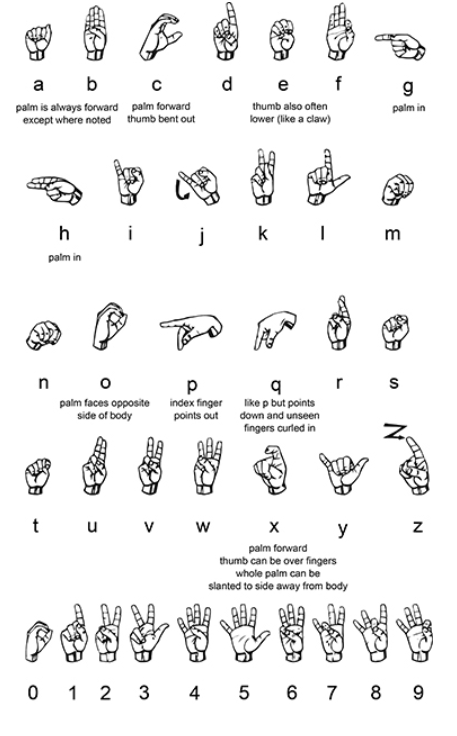

In [8]:
from IPython.display import Image
Image("sign language.png")

# About the Data

Communication is an important part of our lives. Deaf and dumb people being unable to speak and listen, experience a lot of problems while communicating with normal people. There are many ways by which people with these disabilities try to communicate. One of the most prominent ways is the use of sign language, i.e. hand gestures. It is necessary to develop an application for recognizing gestures and actions of sign language so that deaf and dumb people can communicate easily with even those who don’t understand sign language. The objective of this work is to take an elementary step in breaking the barrier in communication between the normal people and deaf and dumb people with the help of sign language.

American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well. 

It's now the job is to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

In [9]:
### Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the data

In [178]:
train=pd.read_csv("sign_mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [179]:
test=pd.read_csv("sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


#### Getting the shapes of the data

In [67]:
print("No. of training examples:", train.shape[0])
print("No. of testing examples: ", test.shape[0])
print()
print("Train shape: ",train.shape)
print("Test shape: ",test.shape)

No. of training examples: 27455
No. of testing examples:  7172

Train shape:  (27455, 785)
Test shape:  (7172, 785)


In [15]:
### Can visualize the original data set 

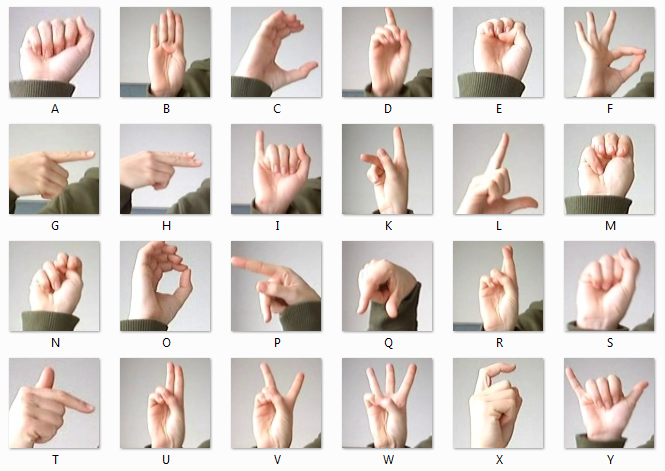

In [17]:
Image("amer_sign2.png")

The above sign image is the original image but our training examples are in the pixel of 28x28 in the gray scale mode

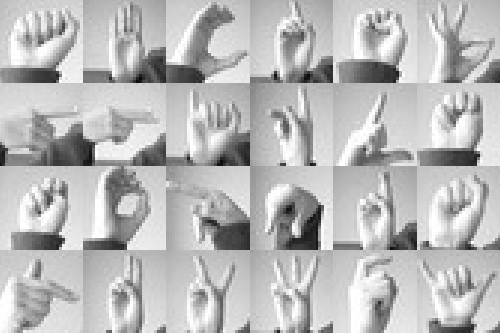

In [18]:
Image("amer_sign3.png")

### Data Processing

In [180]:
labels=train["label"]

In [181]:
print("No. of classes in the label: "+str(np.unique(labels)))

No. of classes in the label: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [88]:
len(np.unique(labels))

24

In [22]:
### Checking the value counts of out data to mesasure the consisteny

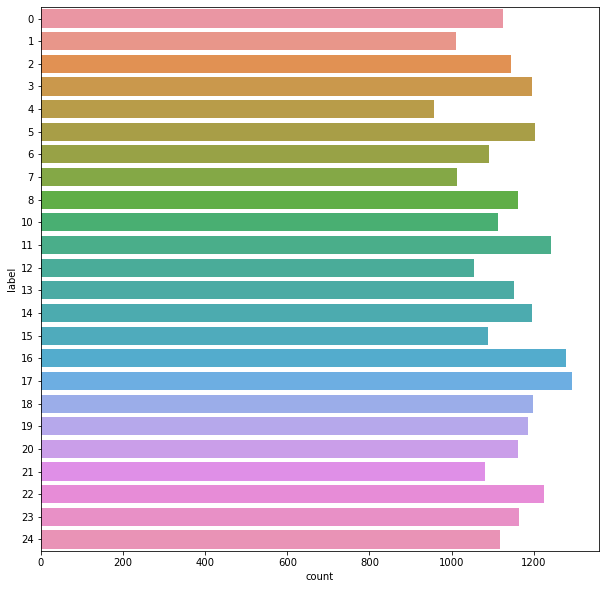

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(y=labels)

In [27]:
### Changing the no. of classes into vectors of C*C shape [C= classes]

In [182]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [29]:
### Now Lets drop the label column in the training data

In [183]:
train.drop('label',axis=1,inplace=True)
print(train.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     107     118     127     134     139     143     146     150     153   
1     155     157     156     156     156     157     156     158     158   
2     187     188     188     187     187     186     187     188     187   
3     211     211     212     212     211     210     211     210     210   
4     164     167     170     172     176     179     180     184     185   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      156  ...       207       207       207       207       206       206   
1      157  ...        69       149       128        87        94       163   
2      186  ...       202       201       200       199       198       199   
3      211  ...       235       234       233       231       230       226   
4      186  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       

In [184]:
images=train.values
print(images.min(), images.max(), images.shape)

0 255 (27455, 784)


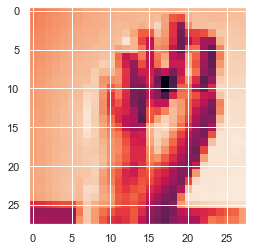

In [185]:
plt.imshow(images[4].reshape(28,28))
# plt.savefig('test_image1.png')

Text(0.5, 0.98, 'Darkgrid images')

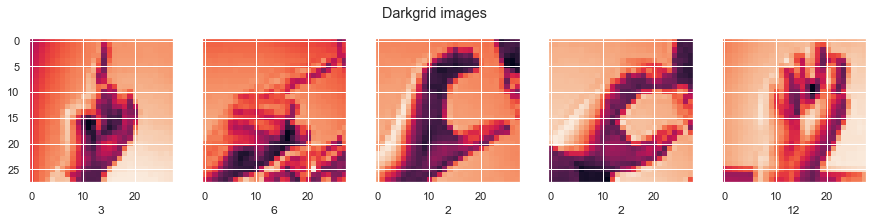

In [190]:
sns.set(style='darkgrid')
# plt.style.use('grayscale')
fig, axs = plt.subplots(1, 5, figsize=(15,3), sharey=True)
ax=axs.ravel()
for i in range(5): 
        ax[i].imshow(images[i].reshape(28,28))
        ax[i].set_xlabel(np.argmax(labels[i]))
fig.suptitle('Darkgrid images')

### Normalizing the Data

In [101]:
images=images/255

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(images,labels,test_size=0.3,random_state=3)

In [103]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)

## Applying Convolutional Network

In [165]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Input, Dense,Activation, Conv2D,BatchNormalization,ZeroPadding2D, MaxPooling2D, Flatten, Dropout

In [113]:
from keras.models import Sequential 
Input_shape = X_train.shape[1:]
kerasmodel=Sequential()
kerasmodel.add(ZeroPadding2D((3,3)))

kerasmodel.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),input_shape=Input_shape))
kerasmodel.add(BatchNormalization(axis=3,name='bn0'))
kerasmodel.add(Activation('relu'))
kerasmodel.add(MaxPooling2D(2,2))

kerasmodel.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)))
kerasmodel.add(BatchNormalization(axis=3,name='bn1'))
kerasmodel.add(Activation('relu'))
kerasmodel.add(MaxPooling2D(2,2))

kerasmodel.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)))
kerasmodel.add(BatchNormalization(axis=3,name='bn2'))
kerasmodel.add(Activation('relu'))
kerasmodel.add(MaxPooling2D(2,2))


kerasmodel.add(Flatten())

kerasmodel.add(Dense(units=128,activation='relu'))
kerasmodel.add(Dense(units=24,activation='softmax'))


In [115]:
kerasmodel.compile('adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [119]:
history=kerasmodel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=16,batch_size=64)

Train on 19218 samples, validate on 8237 samples
Epoch 1/16
19218/19218 [==============================] - 108s 6ms/step - loss: 9.5740e-06 - accuracy: 1.0000 - val_loss: 1.9456e-05 - val_accuracy: 1.0000
Epoch 2/16
19218/19218 [==============================] - 107s 6ms/step - loss: 8.0677e-06 - accuracy: 1.0000 - val_loss: 1.7347e-05 - val_accuracy: 1.0000
Epoch 3/16
19218/19218 [==============================] - 109s 6ms/step - loss: 6.7495e-06 - accuracy: 1.0000 - val_loss: 1.3261e-05 - val_accuracy: 1.0000
Epoch 4/16
19218/19218 [==============================] - 117s 6ms/step - loss: 5.6199e-06 - accuracy: 1.0000 - val_loss: 1.2859e-05 - val_accuracy: 1.0000
Epoch 5/16
19218/19218 [==============================] - 109s 6ms/step - loss: 4.6970e-06 - accuracy: 1.0000 - val_loss: 1.0358e-05 - val_accuracy: 1.0000
Epoch 6/16
19218/19218 [==============================] - 115s 6ms/step - loss: 3.8454e-06 - accuracy: 1.0000 - val_loss: 9.0981e-06 - val_accuracy: 1.0000
Epoch 7/16
1921

#### Visualising the model performance on train and validation 

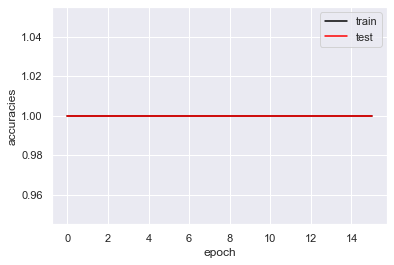

In [131]:
plt.plot(history.history['accuracy'],color='Black')
plt.plot(history.history["val_accuracy"],color='red')

# plt.ylim(0.80, 1.05)
# plt.ylim(0.80, 1.05)
plt.xlabel("epoch")
plt.ylabel("accuracies")
plt.legend(['train','test'])
plt.show()

We have the tested the model performance on the validation data. Now lets train on the test data.
Before model fitting we need to preprocess the data in the same which have done on the training data

In [133]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [134]:
test_labels=test['label']
test.drop('label',axis=1,inplace=True)
test_images=test.values/255
test_labels = lb.fit_transform(test_labels)
test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)
print(test_images.shape)

(7172, 28, 28, 1)


#### Evaluating Model

In [139]:
y_pred = kerasmodel.predict(test_images)
from sklearn.metrics import accuracy_score
y_pred = y_pred.round()
accuracy_score(test_labels, y_pred)

0.9652816508644729

In [140]:
preds = kerasmodel.evaluate(test_images, test_labels, batch_size=16, verbose=1, sample_weight=None)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7172/7172 [==============================] - 13s 2ms/step

Loss = 0.14780919415093502
Test Accuracy = 0.9655604958534241


In [142]:
predicted_classes=kerasmodel.predict_classes(test_images, batch_size=16)
predicted_classes

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [143]:
y_test=test_labels.argmax(1)
y_test

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

## Testing the model

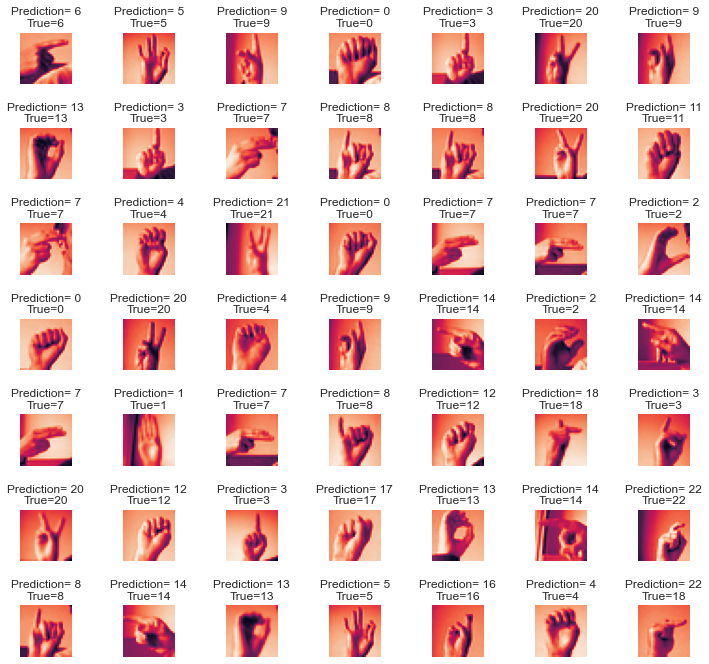

In [145]:
L=7  
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### Test with your own image

My hand Image


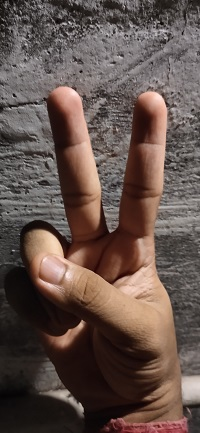

In [194]:
print("My hand Image")
Image("my_hand_test_image.jpg")

ValueError: Error when checking input: expected sequential_5_input to have shape (28, 28, 1) but got array with shape (28, 28, 3)

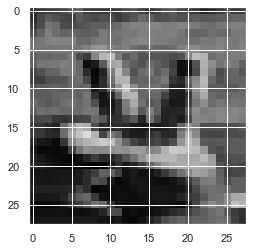

In [155]:
## Importing necessary libraries
from keras.preprocessing import image
from matplotlib.pyplot import imshow
from keras.applications.imagenet_utils import preprocess_input

img_path = 'my_hand_test_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(28, 28))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(kerasmodel.predict(x))

##### We can see that the shape of test image and the image which the model predicts are not same

In [158]:
# img_path = 'my_hand.png'
# img = image.load_img(img_path, target_size=(28, 28))
# # imshow(img)

# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# print(x)

[[[[ 43.  43.  43.]
   [ 58.  58.  58.]
   [ 59.  59.  59.]
   ...
   [ 76.  76.  76.]
   [ 59.  59.  59.]
   [ 61.  61.  61.]]

  [[ 44.  44.  44.]
   [ 73.  73.  73.]
   [ 92.  92.  92.]
   ...
   [ 95.  95.  95.]
   [102. 102. 102.]
   [100. 100. 100.]]

  [[ 56.  56.  56.]
   [ 77.  77.  77.]
   [116. 116. 116.]
   ...
   [124. 124. 124.]
   [130. 130. 130.]
   [128. 128. 128.]]

  ...

  [[  8.   8.   8.]
   [  8.   8.   8.]
   [  9.   9.   9.]
   ...
   [143. 143. 143.]
   [190. 190. 190.]
   [179. 179. 179.]]

  [[ 14.  14.  14.]
   [ 16.  16.  16.]
   [ 16.  16.  16.]
   ...
   [ 89.  89.  89.]
   [ 61.  61.  61.]
   [ 48.  48.  48.]]

  [[ 22.  22.  22.]
   [ 22.  22.  22.]
   [ 23.  23.  23.]
   ...
   [109. 109. 109.]
   [ 66.  66.  66.]
   [ 46.  46.  46.]]]]


In [159]:
x.shape

(1, 28, 28, 3)

In [168]:
# X_input=Input((28,28,3))
# X=Conv2D(filters = 1, kernel_size = (1, 1), strides = (1,1), padding = 'same')(X_input)


In [170]:
# X.shape

In [171]:
# model.fit(x)

In [192]:
# plt.imshow(images[115].reshape(28,28))
# plt.savefig("test_image1.png")